In [35]:
from sklearn.datasets import load_diabetes
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
%matplotlib inline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [2]:
data=load_diabetes(scaled=False)
X=data.data
Y= data.target
colnames=data.feature_names
colnames
df=pd.DataFrame(X,columns=colnames)
df
df["Target"]=Y
df
df.dtypes
print(df)
df.nunique()

      age  sex   bmi      bp     s1     s2    s3    s4      s5     s6  Target
0    59.0  2.0  32.1  101.00  157.0   93.2  38.0  4.00  4.8598   87.0   151.0
1    48.0  1.0  21.6   87.00  183.0  103.2  70.0  3.00  3.8918   69.0    75.0
2    72.0  2.0  30.5   93.00  156.0   93.6  41.0  4.00  4.6728   85.0   141.0
3    24.0  1.0  25.3   84.00  198.0  131.4  40.0  5.00  4.8903   89.0   206.0
4    50.0  1.0  23.0  101.00  192.0  125.4  52.0  4.00  4.2905   80.0   135.0
..    ...  ...   ...     ...    ...    ...   ...   ...     ...    ...     ...
437  60.0  2.0  28.2  112.00  185.0  113.8  42.0  4.00  4.9836   93.0   178.0
438  47.0  2.0  24.9   75.00  225.0  166.0  42.0  5.00  4.4427  102.0   104.0
439  60.0  2.0  24.9   99.67  162.0  106.6  43.0  3.77  4.1271   95.0   132.0
440  36.0  1.0  30.0   95.00  201.0  125.2  42.0  4.79  5.1299   85.0   220.0
441  36.0  1.0  19.6   71.00  250.0  133.2  97.0  3.00  4.5951   92.0    57.0

[442 rows x 11 columns]


age        58
sex         2
bmi       163
bp        100
s1        141
s2        302
s3         63
s4         66
s5        184
s6         56
Target    214
dtype: int64

In [3]:
df.isna().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
Target    0
dtype: int64

<Axes: >

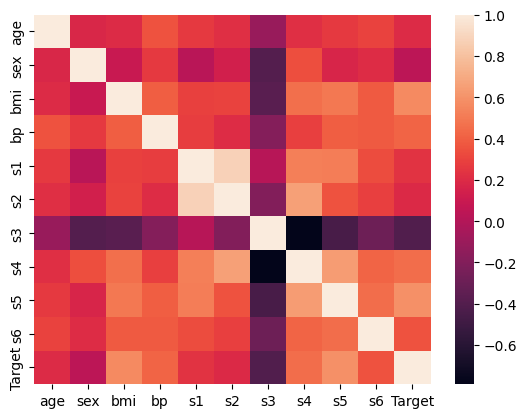

In [4]:
correlation=df.corr(method="spearman")
sn.heatmap(correlation)

<Axes: >

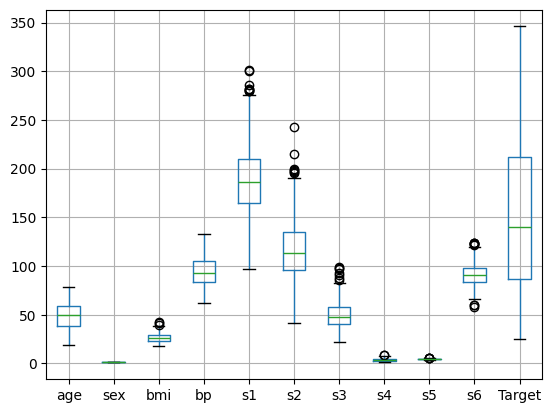

In [5]:
df.boxplot()

In [6]:
Q1= df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
higher_bound=Q3+1.5*IQR
outlier_rmd=df[(df >= lower_bound) & (df <= higher_bound)]

In [7]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, random_state=30,shuffle=True)

In [8]:
LG=LinearRegression(n_jobs=-1)
LG.fit(X_train, Y_train)
print("Linear Regression  Training Score: ", LG.score(X_train, Y_train))
print("Linear Regression  Test Score: ", LG.score(X_test, Y_test))

Linear Regression  Training Score:  0.5201242017313752
Linear Regression  Test Score:  0.49233545660220845


In [9]:
RF= RandomForestRegressor(n_estimators=25,max_depth=15,random_state=30,n_jobs=-1)
RF.fit(X_train, Y_train)
print("Random Forest Training Score: ", RF.score(X_train, Y_train))
print("Random Forest  Test Score: ", RF.score(X_test, Y_test))

Random Forest Training Score:  0.9098972682649866
Random Forest  Test Score:  0.4628151984197475


In [10]:
DT=DecisionTreeRegressor(max_depth=20,random_state=30)
DT.fit(X_train, Y_train)
print("Decision Tree  Training Score: ", DT.score(X_train, Y_train))
print("Decision Tree  Test Score: ", DT.score(X_test, Y_test))

Decision Tree  Training Score:  1.0
Decision Tree  Test Score:  -0.06671343940759544


In [11]:
KNN=KNeighborsRegressor(n_neighbors=2,n_jobs=-1)
KNN.fit(X_train, Y_train)
print("KNN train Score: ", KNN.score(X_train, Y_train))
print("KNN Test Score: ", KNN.score(X_test, Y_test))

KNN train Score:  0.6637241286776321
KNN Test Score:  0.08634282414064653


In [12]:
svm=SVR(degree=3)
svm.fit(X_train, Y_train)
print("svm train Score: ", svm.score(X_train, Y_train))
print("svm Test Score: ", svm.score(X_test, Y_test))

svm train Score:  0.01583842528794932
svm Test Score:  -1.578402348734187e-05


In [13]:
from imblearn.over_sampling import SMOTE

In [14]:
smote=SMOTE(random_state=30,n_jobs=-1)
X_resampled, y_resampled = smote.fit_resample(X, Y)

C:\Users\chitr\anaconda3\envs\py3.12\Lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 1, n_samples = 1

In [27]:
import xgboost as xgb
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')
xgb_reg.fit(X_train, Y_train)
print("XGB train Score: ", xgb_reg.score(X_train, Y_train))
print("XGB Test Score: ", xgb_reg.score(X_test, Y_test))

XGB train Score:  0.999996184146389
XGB Test Score:  0.34913956237209265


In [24]:
from sklearn.ensemble import AdaBoostRegressor
base_regressor = DecisionTreeRegressor(max_depth=6)
ada_reg = AdaBoostRegressor(estimator=base_regressor, n_estimators=100, random_state=42)
ada_reg.fit(X_train, Y_train)
print("ADB train Score: ", ada_reg.score(X_train, Y_train))
print("ADB Test Score: ", ada_reg.score(X_test, Y_test))

ADB train Score:  0.9128322962544693
ADB Test Score:  0.4198283142160414


In [44]:
models = {
    "lg": LinearRegression(n_jobs=-1),
    "dt": DecisionTreeRegressor(random_state=30),
    "rf": RandomForestRegressor(n_jobs=-1,random_state=30),
    "knn": KNeighborsRegressor(n_jobs=-1),
    #"svr": SVR(),
    "xgb": xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=42),
    "adb": AdaBoostRegressor(estimator=RandomForestRegressor(), random_state=42)
}

In [48]:
param_grids = {
    "lg":{},
    "dt":{
        "max_depth":[5,10,15,20,25,30],
    },
    "rf":{
        "n_estimators":[10,20,30,40],
        "max_depth":[5,10,15,20,25,30]
    },
    "knn":{
        "n_neighbors":[3,5,7,9,11]
    },
    #"svr":{
    #    "kernel" : ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
    #    "degree":[1,2,3],
    #    "C":[0.5,1,3],
    #},
    'xgb': {
        'n_estimators': [10,20,30,40],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 6, 9],
        'subsample': [0.8, 1.0]
    },
    'adb': {
        #'n_estimators': [10,20,30,40],
        #'base_estimator__max_depth': [3, 5, 7]
    }
}

In [54]:
best_models = {}
results = {}

# Iterate over models and their parameter grids
for model_name, model in models.items():
    print(f"Running Grid Search for {model_name}...")
    
    # Create GridSearchCV object
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[model_name],
        cv=5,  # Number of cross-validation folds
        scoring='neg_mean_squared_error',  # Scoring metric
        n_jobs=-1,  # Use all available CPUs
        verbose=2  # Verbosity level
    )
    
    # Fit GridSearchCV
    grid_search.fit(X_train, Y_train)
    
    # Store the best model and results
    best_models[model_name] = grid_search.best_estimator_
    results[model_name] = grid_search.cv_results_

    # Print the best parameters and score
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best score for {model_name}: {-grid_search.best_score_}")

# Evaluate the best models on the test set
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, y_pred)
    r2= r2_score(Y_test, y_pred)
    print(f"Test Mean Squared Error for {model_name}: {mse}")
    print(f"Test R2 Score for {model_name}: {r2}")

Running Grid Search for lg...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for lg: {}
Best score for lg: 2958.780111648191
Running Grid Search for dt...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for dt: {'max_depth': 5}
Best score for dt: 4449.529731237581
Running Grid Search for rf...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for rf: {'max_depth': 5, 'n_estimators': 40}
Best score for rf: 3365.1142210821918
Running Grid Search for knn...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters for knn: {'n_neighbors': 9}
Best score for knn: 4115.57599041828
Running Grid Search for xgb...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters for xgb: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 30, 'subsample': 1.0}
Best score for xgb: 3341.4994359030497
Running Grid Search for adb...
Fitting 5 folds for each of 1 candidates, totalling

In [52]:
from sklearn.metrics import mean_squared_error, r2_score